In [2]:
import itertools as it
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In this example, you are doing drug discovery! You can select three compounds to create a drug, and receive a measurement of the people’s adverse reaction to the drug. You want to make this as close as possible to zero. (hint: one of the variables may not cause any effects on the person).

In [3]:
X = np.load('../initial_data/function_3/initial_inputs.npy')
Y = np.load('../initial_data/function_3/initial_outputs.npy')

## Random Search

In [4]:
next_query = np.random.uniform(size=3)
print(f"next_query: {'-'.join(['%.6f' % x for x in next_query])}")

next_query: 0.484448-0.944606-0.816536


## Upper Confidence Bound

In [5]:
gpr = GaussianProcessRegressor(kernel=None)
gpr.fit(X, Y)

# use gridsearch to optimise the acquisition function
x1 = np.linspace(0, 1, 5)
x2 = np.linspace(0, 1, 5)

dim=3
X_grid = np.fromiter(it.chain(*it.product(x1, repeat=dim)), dtype=float).reshape(-1, dim)

mean, std = gpr.predict(X_grid, return_std=True)
ucb = mean + 1.96 * std

idx_max = np.argmax(ucb)
next_query = X_grid[idx_max]
print(f"next_query: {'-'.join(['%.6f' % x for x in next_query])}")

next_query: 1.000000-0.000000-0.750000


## Visualising the data

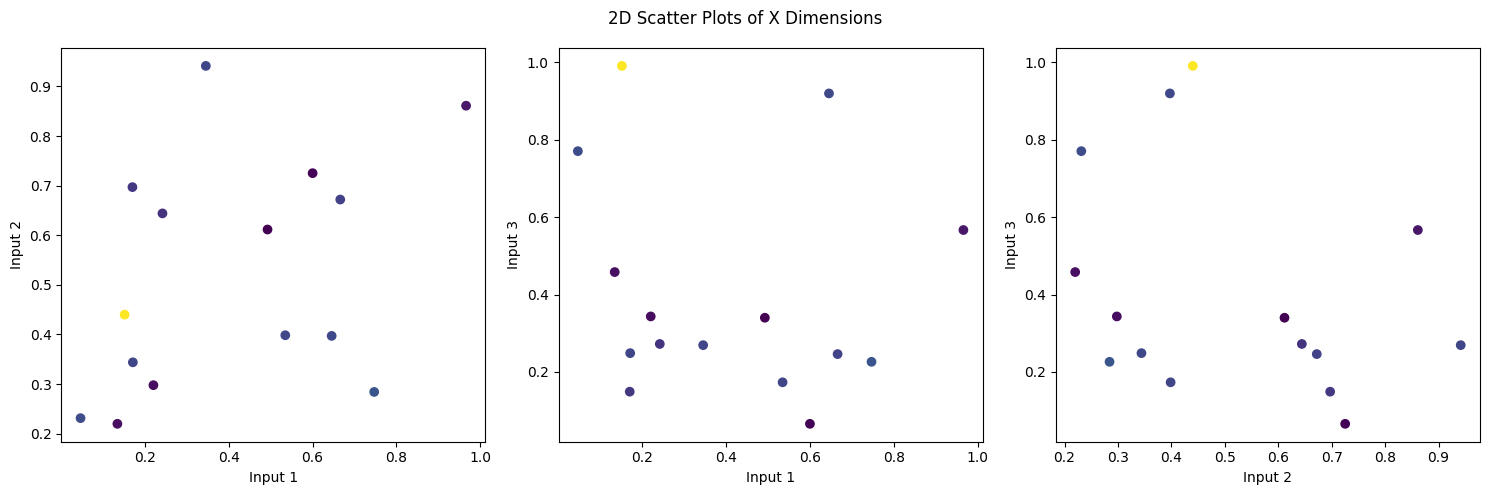

In [14]:
import matplotlib.pyplot as plt

# Create a figure with subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot the first dimension against the second dimension
axs[0].scatter(X[:, 0], X[:, 1], c=1-Y, cmap='viridis')
axs[0].set_xlabel('Input 1')
axs[0].set_ylabel('Input 2')

# Plot the first dimension against the third dimension
axs[1].scatter(X[:, 0], X[:, 2], c=1-Y, cmap='viridis')
axs[1].set_xlabel('Input 1')
axs[1].set_ylabel('Input 3')

# Plot the second dimension against the third dimension
axs[2].scatter(X[:, 1], X[:, 2], c=1-Y, cmap='viridis')
axs[2].set_xlabel('Input 2')
axs[2].set_ylabel('Input 3')

# Set the title for the entire figure
fig.suptitle('2D Scatter Plots of X Dimensions')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

In [15]:
# Use a restricted UCB
gpr = GaussianProcessRegressor()
gpr.fit(X, Y)

# use gridsearch to optimise the acquisition function
x1 = np.linspace(0.15, 0.25, 100)
x2 = np.linspace(0.4, 0.5, 100)
x3 = np.linspace(0.9, 1.0, 100)

X_grid = []
for i in range(len(x1)):
    for j in range(len(x2)):
        for k in range(len(x3)):
            X_grid.append([x1[i], x2[j], x3[k]])

X_grid = np.array(X_grid)
mean, std = gpr.predict(X_grid, return_std=True)
ucb = mean + 1.96 * std

print(f"ucb: {ucb}")
print(f"mean: {mean}")
print(f"std: {std}")

idx_max = np.argmax(ucb)
next_query = X_grid[idx_max]

print(f"next_query: {'-'.join(['%.6f' % x for x in next_query])}")

ucb: [-0.2299333  -0.23130159 -0.23267402 ... -0.38035126 -0.38194084
 -0.38352878]
mean: [-0.25061533 -0.2517771  -0.25294249 ... -0.40683046 -0.40841953
 -0.41001193]
std: [0.01055206 0.01044669 0.01034106 ... 0.0135098  0.01350954 0.01351181]
next_query: 0.250000-0.400000-0.900000
